# Developing a Machine Learning Model to Predict MLB All-Stars Using Fundamental Baseball Statistics

<img src="https://static01.nyt.com/images/2021/04/05/sports/05mlb-ohtani-1/05mlb-ohtani-1-mediumSquareAt3X.jpg" alt="Ohtani Shohei" width="400" height="300">

## Project Description

**Jamie Laguerta**\
**73122848**\
**MANU 465**

**Objective:** This project aims to predict whether a Major League Baseball (MLB) player should be selected as an All-Star based on a set of five fundamental baseball statistics: Batting Average (BA), Home Runs (R), Runs Batted In (RBI), On-Base Percentage (OBP), and Slugging Percentage (SLG). 

**Data:**  The dataset used for this analysis includes MLB player statistics, encompassing batting performance metrics and All-Star designation for each player. All data is from the 2023 MLB Season.

*For a more comprehensive description of the fundamental baseball statistics used, feel free to consult the appendix at the end of this report.*



## Data Import

In [11]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.model_selection import cross_val_score
# importing the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [12]:
data = pd.read_csv("MLB_Batting.csv")
data = data.fillna(0)
data.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,All Star
0,1,CJ Abrams*,22,WSN,NL,89,340,316,47,82,...,0.434,0.739,105,137,5,8,3,0,0,0.0
1,2,José Abreu,36,HOU,AL,95,400,368,33,90,...,0.353,0.646,79,130,11,3,0,5,1,0.0
2,3,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,...,0.578,0.986,160,226,7,4,0,2,2,1.0
3,4,Willy Adames,27,MIL,NL,89,383,336,44,71,...,0.411,0.702,90,138,9,3,0,5,0,0.0
4,5,Riley Adams,27,WSN,NL,23,87,79,4,22,...,0.506,0.844,133,40,4,1,1,0,0,0.0


## Data Exploration

The raw dataset includes **all** players who have appeared in an MLB game in 2023. It includes all of the commonly recorded batting statistics. Because of the MLB's extensive use of the minor league system, we should filter out players who do not have a sufficient number of game or plate appearances. Doing so will give us a more representative data set.

*Please see appendix for further details*

Text(0.5, 1.0, 'Histogram of PA Data')

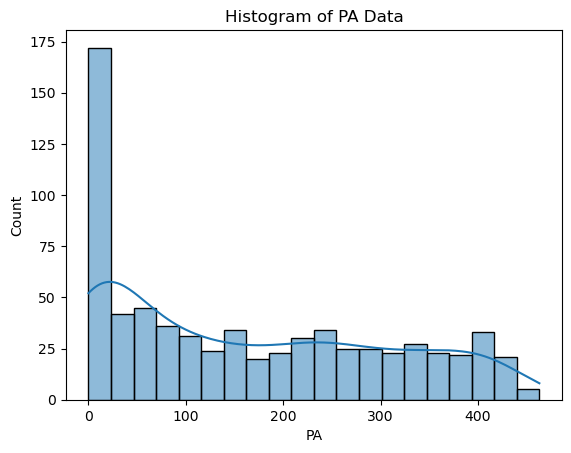

In [13]:
sb.histplot(data['PA'], kde=True, bins=20)
plt.title("Histogram of PA Data")

### Plate Appearances (PA) Filter

One crucial aspect of our analysis is the decision to filter out players with fewer than 50 Plate Appearances (PA). Plate Appearances represent the official times a player comes to bat in a game, excluding walks, sacrifices, or other events that do not involve a traditional at-bat.

We chose to filter out players with fewer than 50 PAs for the following reasons:

1. **Sample Size**: To ensure statistical significance and reliability in our analysis, it is essential to work with a reasonably sized dataset. By setting a minimum threshold of 50 PAs, we focus on players who have a more substantial and representative performance history.

2. **Eliminating Noise**: Players with extremely low PAs may include individuals who had limited opportunities due to injuries, call-ups, or other factors. These players may not provide sufficient data to draw meaningful conclusions about their performance.

3. **All-Star Criteria**: All-Star selections typically require players to demonstrate a consistent and impactful performance over the course of a season. Filtering out players with very low PAs helps ensure that our analysis considers players who have contributed meaningfully to their teams.



In [14]:
dataFiltered = data[data['PA'] >= 50]

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,All Star
0,1,CJ Abrams*,22,WSN,NL,89,340,316,47,82,...,0.434,0.739,105,137,5,8,3,0,0,0.0
1,2,José Abreu,36,HOU,AL,95,400,368,33,90,...,0.353,0.646,79,130,11,3,0,5,1,0.0
2,3,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,...,0.578,0.986,160,226,7,4,0,2,2,1.0
3,4,Willy Adames,27,MIL,NL,89,383,336,44,71,...,0.411,0.702,90,138,9,3,0,5,0,0.0
4,5,Riley Adams,27,WSN,NL,23,87,79,4,22,...,0.506,0.844,133,40,4,1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,688,Mike Yastrzemski*,32,SFG,NL,70,268,239,41,55,...,0.435,0.746,103,104,2,1,1,0,2,0.0
688,689,Christian Yelich*,31,MIL,NL,95,410,360,71,103,...,0.478,0.851,132,172,8,3,0,0,3,0.0
690,691,Masataka Yoshida*,29,BOS,AL,86,370,335,52,107,...,0.501,0.883,135,168,11,6,0,1,0,0.0
693,694,Seby Zavala,29,CHW,AL,59,156,143,14,23,...,0.308,0.515,40,44,3,1,2,2,0,0.0


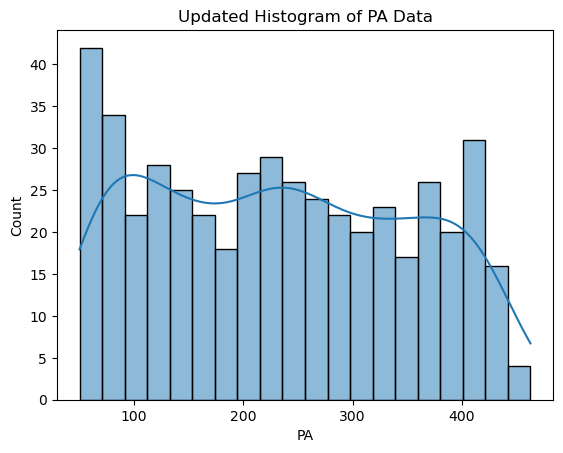

In [15]:
sb.histplot(dataFiltered['PA'], kde=True, bins=20)
plt.title("Updated Histogram of PA Data")
dataFiltered

After filtering out players with less than 50 PA, we have a much more representative dataset with roughly three peaks:
- ~40 
- ~220 
- ~400 

Baseball is a game of many statistics. In our analysis, we narrow down our statistics of interest to Batting Average (BA), Home Runs(HR), Runs Batted In (RBI), On-Base Percentage (OBP), and Slugging Percentage (SLG). To gain further insight into how these stats correlate to All Star performance, 

We then separate our data to only our desired statistics and outcomes.

In [16]:
dataInterest = dataFiltered.loc[:, ['BA', 'HR', 'RBI', 'OBP', 'SLG', 'All Star']]


In [17]:
dataInterest.head()

,BA,HR,RBI,OBP,SLG,All Star
0,0.259,10,39,0.306,0.434,0.0
1,0.245,8,50,0.293,0.353,0.0
2,0.330,23,58,0.408,0.578,1.0
3,0.211,17,48,0.291,0.411,0.0
4,0.278,3,10,0.337,0.506,0.0


All Star    1.000000
RBI         0.515688
HR          0.507090
SLG         0.393974
OBP         0.321399
BA          0.314770
Name: All Star, dtype: float64

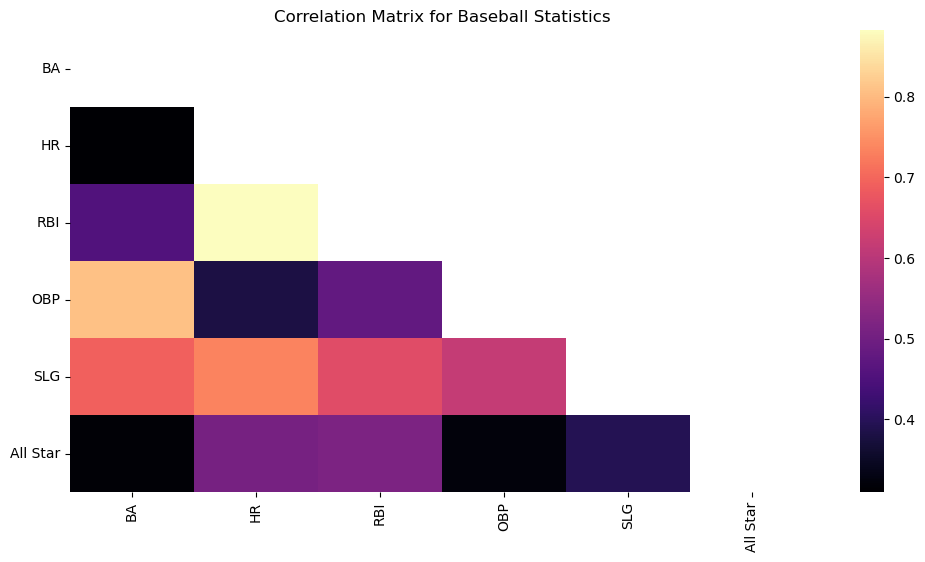

In [18]:

corr_matrix = dataInterest.corr()


# visualizing the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(12, 6))  # to set the figure size
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix for Baseball Statistics")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)


  
corr_matrix['All Star'].sort_values(ascending=False)  

As seen in the correlation heatmap above, there is no strong correlation between a single stat and becoming an MLB All Star. Therefore it is important to take into account a number of stats together to develop a model that determines if a player is an all star or not.

Out of the statistics of interest, home runs(HR) and runs batted in(RBI) have a correlation of 0.5 or higher. We will use these values in a scatter plot of all all star eligible MLB players.

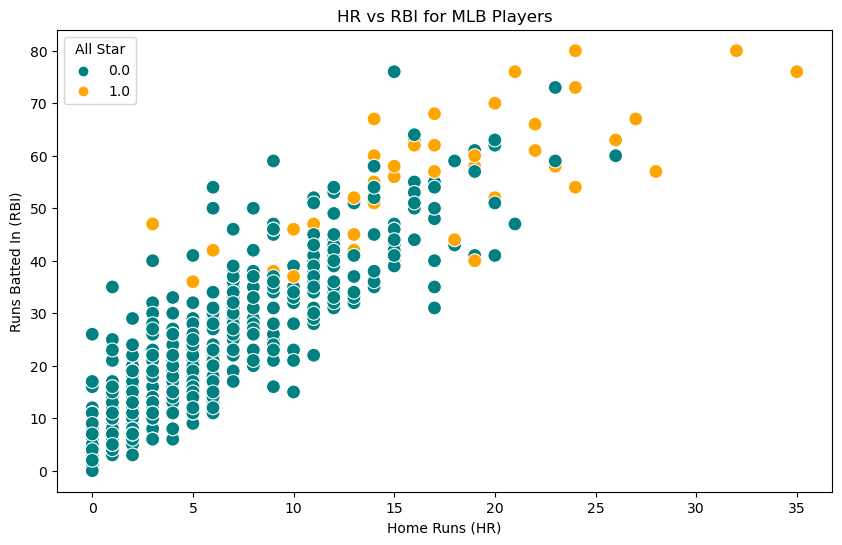

In [46]:
plt.figure(figsize=(10, 6))
scatter = sb.scatterplot(data=dataInterest, x='HR', y='RBI', hue='All Star', palette={0.0: 'teal', 1.0: 'orange'}, s=100)

plt.title('HR vs RBI for MLB Players')
plt.xlabel('Home Runs (HR)')
plt.ylabel('Runs Batted In (RBI)')

legend_labels = {0.0: 'No All Star', 1.0: 'All Star'}

legend_colors = {0.0: 'teal', 1.0: 'orange'}


plt.show()

In the scatter plot above, we can generally see that all star level players usually score more HRs snd have more RBIs than the rest of the population. 

## Data Preprocessing

In [20]:
X = dataInterest.iloc[:, :-1].values
y = dataInterest.iloc[:, -1].values

In [21]:
pd.DataFrame(X)

,0,1,2,3,4
0,0.259,10.0,39.0,0.306,0.434
1,0.245,8.0,50.0,0.293,0.353
2,0.330,23.0,58.0,0.408,0.578
3,0.211,17.0,48.0,0.291,0.411
4,0.278,3.0,10.0,0.337,0.506
...,...,...,...,...,...
471,0.230,11.0,30.0,0.311,0.435
472,0.286,14.0,54.0,0.373,0.478
473,0.319,11.0,51.0,0.381,0.501
474,0.161,6.0,15.0,0.208,0.308


In [22]:
pd.DataFrame(y)

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
471,0.0
472,0.0
473,0.0
474,0.0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 , random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(X_train).info

<bound method DataFrame.info of             0         1         2         3         4
0   -0.100095 -0.028399 -0.114091  0.386435 -0.094252
1    0.713768 -0.526475 -0.056592 -0.298358 -0.198637
2    0.641957 -1.190577 -0.919084  0.086838 -0.476998
3    0.258962  0.137626 -0.229090  0.621832 -0.163842
4   -0.052221 -1.024551 -1.034083 -0.105760 -0.534990
..        ...       ...       ...       ...       ...
375 -1.488451 -1.190577 -1.321580  0.900029 -2.239950
376 -0.530964 -0.194424  0.230906 -0.704953 -0.882941
377  0.187151 -0.858526 -0.574087 -0.619354 -0.569785
378  0.594083 -0.360450 -0.056592  0.814430  0.334888
379  0.881329 -1.190577 -1.149082  0.108238 -0.987326

[380 rows x 5 columns]>

We know beforehand that the dataset is complete. We don't need to account for any missing data.

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, y_train)

y_train_pred = KNNclassifier.predict(X_train)

from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on the training set:", train_accuracy)

Accuracy on the training set: 0.9394736842105263


In [26]:
y_pred = KNNclassifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
y_pred = KNNclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[83  3]
 [ 5  5]]
Your Model Accuracy is= 91.66666666666666 %


## Naive Bayes


In [28]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

y_pred = NBclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")


[[81  5]
 [ 3  7]]
Your Model Accuracy is= 91.66666666666666 %


## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
Treeclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Treeclassifier.fit(X_train, y_train)

y_pred = Treeclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[81  5]
 [ 5  5]]
Your Model Accuracy is= 89.58333333333334 %


## SVM Linear

In [30]:
SVMLclassifier = SVC(kernel = 'linear', random_state = 0)
SVMLclassifier.fit(X_train, y_train)

y_pred = SVMLclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[84  2]
 [ 3  7]]
Your Model Accuracy is= 94.79166666666666 %


## SVM Non-Linear

In [31]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel = 'rbf', random_state = 0)
SVMclassifier.fit(X_train, y_train)

y_pred = SVMclassifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")


[[85  1]
 [ 3  7]]
Your Model Accuracy is= 95.83333333333334 %


## Testing the Model on Random Statistics

In [53]:
import warnings
warnings.filterwarnings('ignore')
player_data = {
    'BA': [0.300],
    'HR': [25],
    'RBI': [60],  # Close the square bracket here
    'OBP': [0.400],
    'SLG': [0.400]
}


player_df = pd.DataFrame(player_data)
print(player_df)
player_scaled = sc.transform(player_df)
player_prediction = SVMclassifier.predict(player_scaled)

if(player_prediction[0] == 1):
    status = ("an all star")
else:
    status = ("a fraud")
    
print(f"The above player is {status}")

    BA  HR  RBI  OBP  SLG
0  0.3  25   60  0.4  0.4
The above player is an all star


## Appendix


### Baseball Statistics

1. **Batting Average (BA)**:
   - Batting Average, often simply referred to as "average," is a measure of a player's ability to get hits when they come to bat.
   - It is calculated as the number of hits (base hits) divided by the number of at-bats (official plate appearances where a player attempts to hit the ball).

2. **Home Runs (HR):**

    - Home Runs represent the number of times a player hits a home run, sending the ball over the outfield fence.
    - It indicates a player's power-hitting ability, as hitting home runs often leads to multiple runs being scored.

3. **Runs Batted In (RBI)**:
   - Runs Batted In is a statistic that measures how many runs a player has driven in with their hits.
   - It reflects a player's ability to deliver hits when runners are on base, driving them home to score.

4. **On-Base Percentage (OBP)**:
   - On-Base Percentage calculates the percentage of times a player successfully reaches base (by any means) out of their total plate appearances.
   - It accounts for hits, walks, and hit-by-pitches and is a measure of a player's overall ability to avoid making outs.

5. **Slugging Percentage (SLG)**:
   - Slugging Percentage quantifies a player's power hitting by measuring the average number of bases earned per at-bat.
   - It takes into account extra-base hits (doubles, triples, home runs) and is an indicator of a player's ability to produce extra-base hits.

These statistics are fundamental to evaluating a baseball player's performance at the plate and provide insights into their hitting ability, power, and contribution to scoring runs for their team. In your analysis, you are using these statistics to predict whether a player should be selected as an All-Star, which is a recognition of their exceptional performance in these key aspects of the game.

---

### Minor League System

In Major League Baseball (MLB), the Minor League system serves as a developmental league structure that operates in parallel with the MLB. It consists of various levels or tiers, each representing a stage of player development, from rookie leagues to Triple-A leagues. Players in the Minor League system work their way up through these tiers, refining their skills and gaining experience.

While the Minor Leagues are an essential part of player development, our analysis primarily focuses on MLB players and their eligibility for the prestigious All-Star selection.

---


